# Load Store Handler Class

In [1]:
from RES.hdf5_handler import DataHandler
import RES.visuals as vis

In [2]:
country_code:str='AL' # The tool is designed to work for any province of CANADA.
scenario=1.2
legend_x_ax_offset=1.4

# Define Province Code

In [3]:
store=f"../data/store/resources_{country_code}.h5"# f"../data/store/resources_{province_code}.h5" 
res_data=DataHandler(store) # the DataHandler object could be initiated without the store definition as well.


# What's inside the Store ?

In [4]:
res_data.show_tree(store) # Shows the hierarchical data inside the store

Structure of HDF5 file: ../data/store/resources_AL.h5
[Group] boundary
[Group] cells
[Group] clusters
  └─ [Group] clusters/solar
  └─ [Group] clusters/wind
[Group] cost
  └─ [Group] cost/atb
  └─   └─ [Group] cost/atb/bess
  └─   └─ [Group] cost/atb/solar
  └─   └─ [Group] cost/atb/wind
[Group] dissolved_indices
  └─ [Group] dissolved_indices/solar
  └─ [Group] dissolved_indices/wind
[Group] lines
[Group] timeseries
  └─ [Group] timeseries/clusters
  └─   └─ [Group] timeseries/clusters/solar
  └─   └─ [Group] timeseries/clusters/wind
  └─ [Group] timeseries/solar
  └─ [Group] timeseries/wind
[Group] units


# Load Data from Store

In [5]:
# import pandas as pd
# atb=pd.read_parquet('../data/downloaded_data/NREL/ATB/ATBe.parquet')
# atb.core_metric_parameter.unique()

In [6]:
# Loading Grid Cells Geodataframe
cells=res_data.from_store('cells')
boundary=res_data.from_store('boundary')
solar_clusters=res_data.from_store('clusters/solar')
wind_clusters=res_data.from_store('clusters/wind')
units=res_data.from_store('units')

└> CF vs LCOE plot for wind resources created and saved to : vis/Resources_CF_vs_LCOE_wind.png
└> CF vs LCOE plot for solar resources created and saved to : vis/Resources_CF_vs_LCOE_solar.png


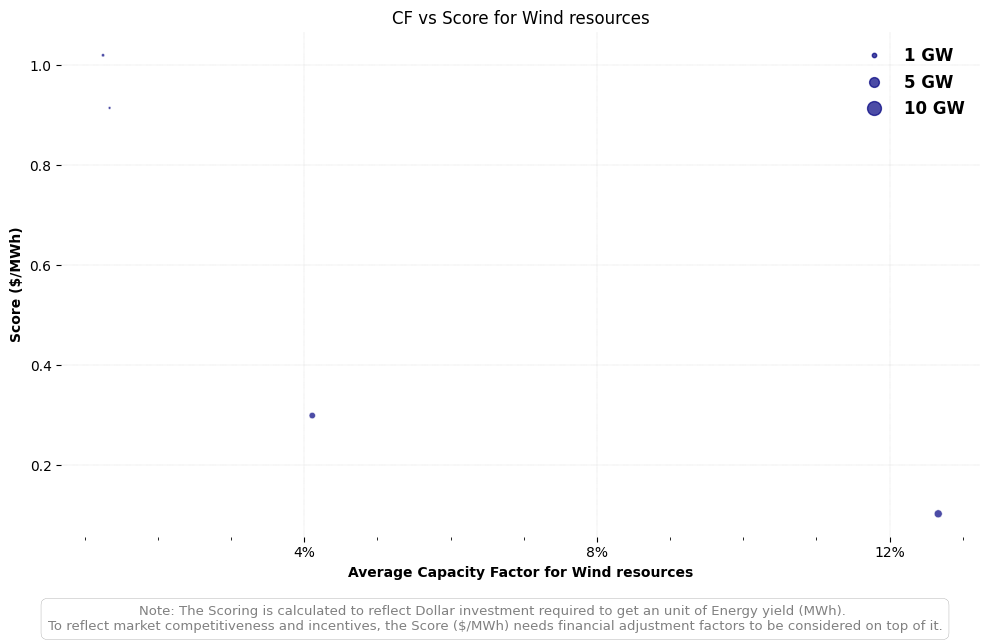

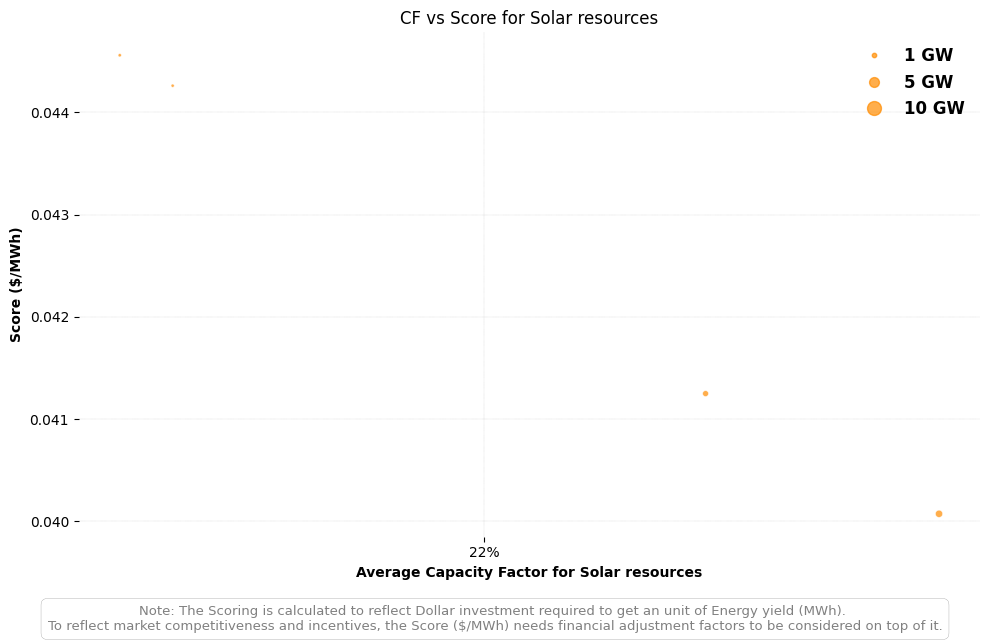

In [7]:
vis.plot_resources_scatter_metric('wind',wind_clusters,200)
vis.plot_resources_scatter_metric('solar',solar_clusters,100)

In [8]:
# vis.get_selected_vs_missed_visuals(cells,'BC','solar',10,0.15,100)

In [9]:
# vis.get_selected_vs_missed_visuals(cells,'BC','wind',10,0.15,100)

In [10]:
# cells[cells['potential_capacity_solar']==0].explore()

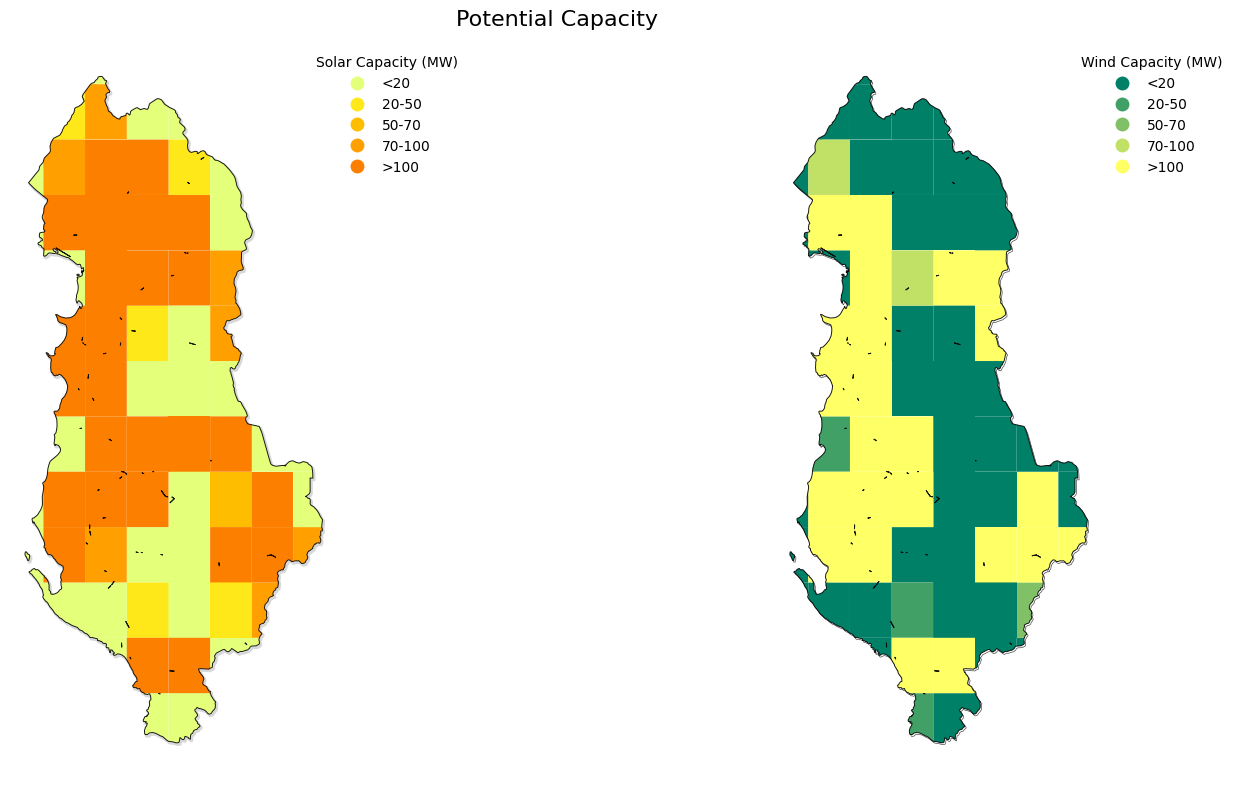

In [11]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Ensure 'Region' is in the columns for both boundary and cells
# if 'Region' not in boundary.columns:
#     boundary = boundary.reset_index(inplace=True)

# Assign a number to each region
# boundary['Region_Number'] = range(1, len(boundary) + 1)

# Define custom bins and labels for solar and wind capacity
bins = [0, 20, 50, 70, 100, float('inf')]  # Custom ranges
labels = ['<20','20-50', '50-70', '70-100', '>100']  # Labels for legend

# Categorize potential_capacity_solar and potential_capacity_wind into bins
cells['solar_category'] = pd.cut(cells['potential_capacity_solar'], bins=bins, labels=labels, include_lowest=True)
cells['wind_category'] = pd.cut(cells['potential_capacity_wind'], bins=bins, labels=labels, include_lowest=True)

# Create figure and axes for side-by-side plotting
fig, (ax1, ax2) = plt.subplots(figsize=(18, 8), ncols=2)
fig.suptitle("Potential Capacity", fontsize=16)
# Set axis off for both subplots
ax1.set_axis_off()
ax2.set_axis_off()

# Shadow effect offset
shadow_offset = 0.008

# Plot solar map on ax1
# Add shadow effect for solar map
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax1, facecolor='none', edgecolor='gray', linewidth=2, alpha=0.3)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# Plot solar cells
cells.plot(column='solar_category', ax=ax1, cmap='Wistia', legend=True, 
           legend_kwds={'title': "Solar Capacity (MW)", 'loc': 'upper right','bbox_to_anchor':(legend_x_ax_offset,1), 'frameon': False})

# Plot actual boundary for solar map
boundary.plot(ax=ax1, facecolor='none', edgecolor='black', linewidth=0.7, alpha=0.9)
"""
# Annotate region numbers for solar map
for idx, row in boundary.iterrows():
    centroid = row.geometry.centroid
    ax1.annotate(f"{row['Region_Number']}", 
                 xy=(centroid.x, centroid.y), 
                 ha='center', va='center',
                 fontsize=7, color='black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
"""
# Plot wind map on ax2
# Add shadow effect for wind map
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax2, color='None', edgecolor='k', linewidth=0.5, alpha=0.7)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# Plot wind cells
cells.plot(column='wind_category', ax=ax2, cmap='summer', legend=True, 
           legend_kwds={'title': "Wind Capacity (MW)", 'bbox_to_anchor':(legend_x_ax_offset,1), 'frameon': False})

# Plot actual boundary for wind map
boundary.plot(ax=ax2, facecolor='none', edgecolor='black', linewidth=0.7, alpha=0.9)
"""
# Annotate region numbers for wind map
for idx, row in boundary.iterrows():
    centroid = row.geometry.centroid
    ax2.annotate(f"{row['Region_Number']}", 
                 xy=(centroid.x, centroid.y), 
                 ha='center', va='center',
                 fontsize=8, color='black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
"""
# Adjust layout for cleaner appearance
fig.patch.set_alpha(0)  # Make figure background transparent
plt.tight_layout()

# Show the side-by-side plot

# plt.savefig('solar_wind_capacity_map.png',dpi=300)
plt.show()

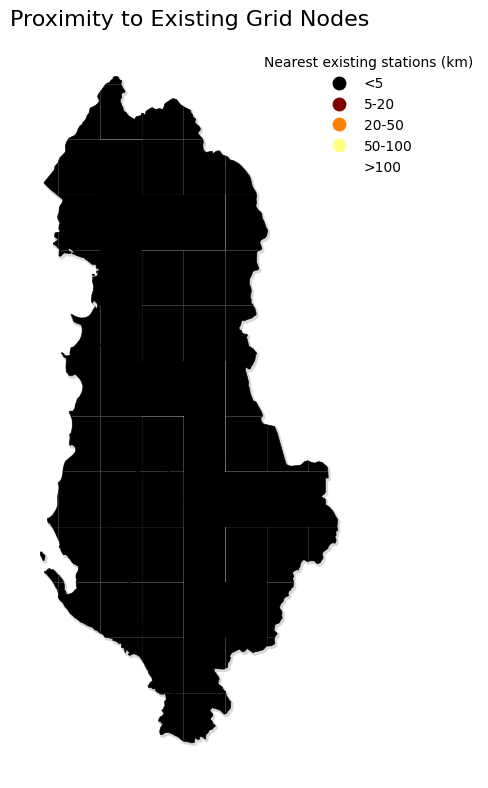

In [12]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# # Ensure 'Region' is in the columns for both boundary and cells
# if 'Region' not in boundary.columns:
#     boundary = boundary.reset_index(inplace=True)


# Define custom bins and labels for solar and wind capacity
bins = [0, 5, 20, 50, 100, float('inf')]  # Custom ranges
labels = ['<5','5-20', '20-50', '50-100', '>100']  # Labels for legend

# Categorize potential_capacity_solar and potential_capacity_wind into bins
# cells['station_distance_category'] = pd.cut(cells['nearest_station_distance_km'], bins=bins, labels=labels, include_lowest=True)
cells['station_distance_category'] = pd.cut(cells['nearest_connection_distance'], bins=bins, labels=labels, include_lowest=True)



# Create figure and axes for side-by-side plotting
fig, (ax) = plt.subplots(figsize=(18, 8))
fig.suptitle("Proximity to Existing Grid Nodes", fontsize=16)
# Set axis off for both subplots
ax.set_axis_off()

# Shadow effect offset
shadow_offset = 0.008

# Plot solar map on ax1
# Add shadow effect for solar map
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=2, alpha=0.3)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# Plot solar cells
cells.plot(column='station_distance_category', ax=ax, cmap='afmhot', legend=True, 
           legend_kwds={'title': "Nearest existing stations (km)", 'loc': 'upper right','bbox_to_anchor':(legend_x_ax_offset,1), 'frameon': False})

# Plot actual boundary for solar map
boundary.plot(ax=ax, facecolor='None', edgecolor='black', linewidth=0.5, alpha=0.9)

# Adjust layout for cleaner appearance
fig.patch.set_alpha(0)  # Make figure background transparent
plt.tight_layout()

# Show the side-by-side plot
plt.show()

Solar CF bins: [0.205292638805994, 0.2260676019114282, 0.23436596943906318]
Wind CF bins: [0.005961459487675584, 0.027097507558914703, 0.047982930554210275, 0.06886835354950585, 0.08975377654480142, 0.11063919954009699, 0.13152462253539257, 0.15241004553068813, 0.1732954685259837, 0.1941808915212793, 0.21506631451657485, 0.23595173751187043, 0.256837160507166]
Solar CF bins: [0.205292638805994, 0.2260676019114282, 0.23436596943906318]
Wind CF bins: [0.005961459487675584, 0.05633709975232851, 0.10646211494103788, 0.15658713012974726, 0.20671214531845664, 0.256837160507166]


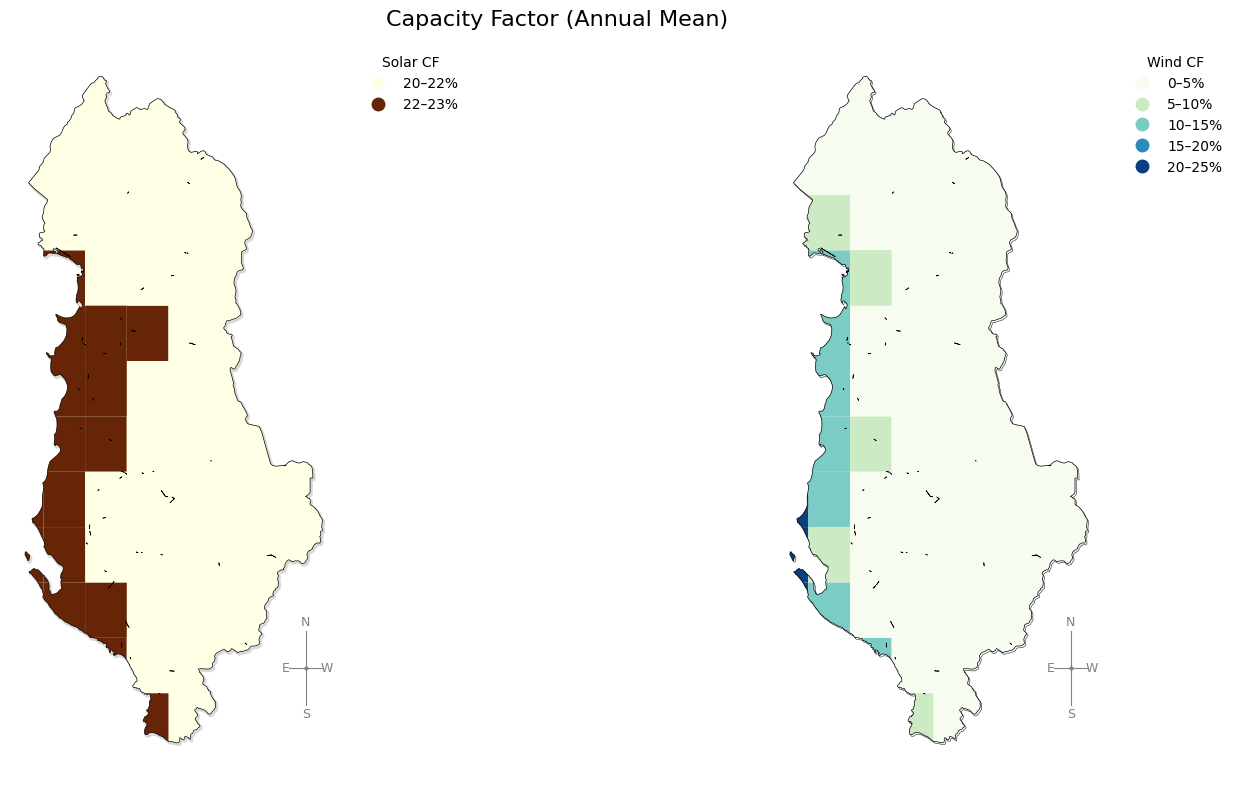

In [13]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from RES.visuals import add_compass_4326
import numpy as np
custom_bins=5
# Ensure 'Region' is in the columns for both boundary and cells
# if 'Region' not in boundary.columns:
#     boundary = boundary.reset_index(inplace=True)

# # Assign a number to each region
# boundary['Region_Number'] = range(1, len(boundary) + 1)

# Automatically create 5 bins for solar and wind CF based on data range
# Use Freedman–Diaconis rule to estimate optimal bin width for solar and wind CF
def freedman_diaconis_bins(data):
    data = data.dropna()
    q75, q25 = np.percentile(data, [75 ,25])
    iqr = q75 - q25
    n = len(data)
    if iqr == 0 or n == 0:
        return 5  # fallback to 5 bins if data is constant or empty
    bin_width = 2 * iqr / (n ** (1/3))
    if bin_width == 0:
        return 5
    bins = int(np.ceil((data.max() - data.min()) / bin_width))
    return max(3, min(bins, 12))  # sensible range: 3 to 12 bins


# Use Freedman–Diaconis rule, but merge bins with <2% width for solar CF
solar_bin_count = freedman_diaconis_bins(cells['solar_CF_mean'])
solar_bins = pd.cut(cells['solar_CF_mean'], bins=solar_bin_count, retbins=True, include_lowest=True)[1]

# Merge bins with width <0.02 (2%)
min_bin_width = 0.02
merged_bins = [solar_bins[0]]
for b in solar_bins[1:]:
    if b - merged_bins[-1] < min_bin_width:
        # merge: skip adding this bin edge
        continue
    merged_bins.append(b)
# Ensure last bin edge is included
if merged_bins[-1] != solar_bins[-1]:
    merged_bins.append(solar_bins[-1])
solar_bins = np.array(merged_bins)

solar_labels = [f'{int(solar_bins[i]*100)}–{int(solar_bins[i+1]*100)}%' for i in range(len(solar_bins)-1)]
print("Solar CF bins:", list(solar_bins))

wind_bin_count = freedman_diaconis_bins(cells['wind_CF_mean'])
wind_bins = pd.cut(cells['wind_CF_mean'], bins=wind_bin_count, retbins=True, include_lowest=True)[1]
wind_labels = [f'{int(wind_bins[i]*100)}–{int(wind_bins[i+1]*100)}%' for i in range(len(wind_bins)-1)]
print("Wind CF bins:", list(wind_bins))
solar_labels = [f'{int(solar_bins[i]*100)}–{int(solar_bins[i+1]*100)}%' for i in range(len(solar_bins)-1)]
print("Solar CF bins:", list(solar_bins))

wind_bins = pd.cut(cells['wind_CF_mean'], bins=custom_bins, retbins=True, include_lowest=True)[1]
wind_labels = [f'{int(wind_bins[i]*100)}–{int(wind_bins[i+1]*100)}%' for i in range(len(wind_bins)-1)]
print("Wind CF bins:", list(wind_bins))
# Drop rows where solar_CF_mean or wind_CF_mean is zero
cells = cells[(cells['solar_CF_mean'] > 0) & (cells['wind_CF_mean'] > 0)]

# Categorize potential_capacity_solar and potential_capacity_wind into bins
cells['solar_category'] = pd.cut(cells['solar_CF_mean'], bins=solar_bins, labels=solar_labels, include_lowest=True)
cells['wind_category'] = pd.cut(cells['wind_CF_mean'], bins=wind_bins, labels=wind_labels, include_lowest=True)

# Create figure and axes for side-by-side plotting
fig, (ax1, ax2) = plt.subplots(figsize=(18, 8), ncols=2)
fig.suptitle("Capacity Factor (Annual Mean)", fontsize=16)
# Set axis off for both subplots
ax1.set_axis_off()
ax2.set_axis_off()

# Shadow effect offset
shadow_offset = 0.008

# Plot solar map on ax1
# Add shadow effect for solar map
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax1, facecolor='none', edgecolor='gray', linewidth=2, alpha=0.3)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# Plot solar cells
cells.plot(column='solar_category', ax=ax1, cmap='YlOrBr', legend=True, 
        legend_kwds={'title': "Solar CF", 'loc': 'upper right', 'bbox_to_anchor':(legend_x_ax_offset,1),'frameon': False})
add_compass_4326(ax1)
# Plot actual boundary for solar map
boundary.plot(ax=ax1, facecolor='none', edgecolor='k', linewidth=0.5, alpha=1)

""" 
# Annotate region numbers for solar map
for idx, row in boundary.iterrows():
    centroid = row.geometry.centroid
    ax1.annotate(f"{row['Region_Number']}", 
                 xy=(centroid.x, centroid.y), 
                 ha='center', va='center',
                 fontsize=7, color='black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
"""
# Plot wind map on ax2
# Add shadow effect for wind map
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax2, color='None', edgecolor='k', linewidth=0.5, alpha=0.7)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# Plot wind cells
cells.plot(column='wind_category', ax=ax2, cmap='GnBu', legend=True, 
           legend_kwds={'title': "Wind CF", 'bbox_to_anchor':(legend_x_ax_offset,1),'frameon': False})

# Plot actual boundary for wind map
boundary.plot(ax=ax2, facecolor='none', edgecolor='k', linewidth=0.5, alpha=1)
add_compass_4326(ax2)
"""
# Annotate region numbers for wind map
for idx, row in boundary.iterrows():
    centroid = row.geometry.centroid
    ax2.annotate(f"{row['Region_Number']}", 
                 xy=(centroid.x, centroid.y), 
                 ha='center', va='center',
                 fontsize=8, color='black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
"""
# Adjust layout for cleaner appearance
fig.patch.set_alpha(0)  # Make figure background transparent
plt.tight_layout()

# Show the side-by-side plot

# plt.savefig('solar_wind_CF_map.png',dpi=300)
plt.show()

In [61]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
from RES.visuals import add_compass_4326

def freedman_diaconis_bins(data, fallback=5, min_bins=3, max_bins=10):
    data = data.dropna()
    q75, q25 = np.percentile(data, [75, 25])
    iqr = q75 - q25
    n = len(data)
    if iqr == 0 or n == 0:
        return fallback
    bin_width = 2 * iqr / (n ** (1/3))
    if bin_width == 0:
        return fallback
    bins = int(np.ceil((data.max() - data.min()) / bin_width))
    return max(min_bins, min(bins, max_bins))

def merge_small_bins(bins, min_width=0.02):
    merged = [bins[0]]
    for b in bins[1:]:
        if b - merged[-1] < min_width:
            continue
        merged.append(b)
    if merged[-1] != bins[-1]:
        merged.append(bins[-1])
    return np.array(merged)

def create_cf_bins(data, method='fd', bin_count=5, min_bin_width=None):
    if method == 'fd':
        bin_count = freedman_diaconis_bins(data)
    bins = pd.cut(data, bins=bin_count, retbins=True, include_lowest=True)[1]
    if min_bin_width:
        bins = merge_small_bins(bins, min_width=min_bin_width)
    labels = [f'{int(bins[i]*100)}–{int(bins[i+1]*100)}%' for i in range(len(bins)-1)]
    return bins, labels

def create_score_bins(data, method='fd', bin_count=5, min_bin_width=None):
    if method == 'fd':
        bin_count = freedman_diaconis_bins(data)
    bins = pd.cut(data, bins=bin_count, retbins=True, include_lowest=True)[1]
    if min_bin_width:
        bins = merge_small_bins(bins, min_width=min_bin_width)
    # Round bin edges to the nearest hundred for labeling
    labels = [f'{int(bins[i])*100}–{int(bins[i+1]*100)}' for i in range(len(bins)-1)]
    return bins, labels

def create_capacity_bins(data, method='fd', bin_count=5, min_bin_width=None):
    if method == 'fd':
        bin_count = freedman_diaconis_bins(data)
    bins = pd.cut(data, bins=bin_count, retbins=True, include_lowest=True)[1]
    if min_bin_width:
        bins = merge_small_bins(bins, min_width=min_bin_width)
    # Round bin edges to the nearest hundred for labeling
    labels = [f'{int(np.round(bins[i], -2))}–{int(np.round(bins[i+1], -2))}' for i in range(len(bins)-1)]
    return bins, labels

def categorize_cells(cells, column, bins, labels, category_name):
    cells = cells.copy()
    cells[category_name] = pd.cut(cells[column], bins=bins, labels=labels, include_lowest=True)
    return cells

def plot_data_map(cells, boundary, datafield:str,
                legend_x_ax_offset=1.05,min_bin_width_wind=0.02,min_bin_width_solar=0.02, custom_solar_bins=None,custom_wind_bins=None):
    
    # Filter out zero values
    if isinstance(datafield, str) and 'CF' in datafield.upper():
        solar_column = 'solar_CF_mean'
        wind_column = 'wind_CF_mean'
        # Generate solar bins
        solar_bins, solar_labels = create_cf_bins(cells[solar_column], method='fd', min_bin_width=min_bin_width_solar)
        # Generate wind bins (fixed count)
        if custom_wind_bins is not None:
            wind_bins, wind_labels = create_cf_bins(cells[wind_column], method='fixed', bin_count=custom_wind_bins if custom_wind_bins else 5)
        else:   
            wind_bins, wind_labels = create_cf_bins(cells[wind_column], method='fd', min_bin_width=min_bin_width_wind)
        plot_title = "Capacity Factor (annual mean)"
    
    # Filter out zero values
    elif isinstance(datafield, str) and 'LCOE' in datafield.upper():
        solar_column = 'lcoe_solar'
        wind_column = 'lcoe_wind'
        # Generate solar bins
        solar_bins, solar_labels = create_score_bins(cells[solar_column], method='fd', min_bin_width=min_bin_width_solar)
        # Generate wind bins (fixed count)
        if custom_wind_bins is not None:
            wind_bins, wind_labels = create_score_bins(cells[wind_column], method='fixed', bin_count=custom_wind_bins if custom_wind_bins else 5)
        else:   
            wind_bins, wind_labels = create_score_bins(cells[wind_column], method='fd', min_bin_width=min_bin_width_wind)
        plot_title = "Site Score ($/MWh)"
    elif isinstance(datafield, str) and 'POTENTIAL_CAPACITY' in datafield.upper():
        solar_column = 'potential_capacity_solar'
        wind_column = 'potential_capacity_wind'
        # Generate solar bins
        if custom_solar_bins is not None:
            solar_bins, solar_labels = create_capacity_bins(cells[solar_column], method='fixed', bin_count=custom_solar_bins if custom_solar_bins else 3)
        else:
            solar_bins, solar_labels = create_capacity_bins(cells[solar_column], method='fd', min_bin_width=min_bin_width_solar)
        # Generate wind bins (fixed count)
        if custom_wind_bins is not None:
            wind_bins, wind_labels = create_capacity_bins(cells[wind_column], method='fixed', bin_count=custom_wind_bins if custom_wind_bins else 5)
        else:   
            wind_bins, wind_labels = create_capacity_bins(cells[wind_column], method='fd', min_bin_width=min_bin_width_wind)
        
        plot_title = "Potential Capacity (MW)"
    else:
        raise ValueError("Currently only 'CF','Potential_capacity' is supported for datafield")
        
    cells = cells[(cells[solar_column] > 0) & (cells[wind_column] > 0)]



    # Categorize
    cells = categorize_cells(cells, solar_column, solar_bins, solar_labels, 'solar_category')
    cells = categorize_cells(cells, wind_column, wind_bins, wind_labels, 'wind_category')

    # Setup plots
    fig, (ax1, ax2) = plt.subplots(figsize=(18, 8), ncols=2)
    fig.suptitle(f"{plot_title}", fontsize=16)
    ax1.set_axis_off()
    ax2.set_axis_off()

    shadow_offset = 0.008

    # Solar map
    boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
    boundary.plot(ax=ax1, facecolor='none', edgecolor='gray', linewidth=2, alpha=0.3)
    boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)
    cells.plot(column='solar_category', ax=ax1, cmap='YlOrBr', legend=True, 
               legend_kwds={'title': f"Solar", 'loc': 'upper right', 
                            'bbox_to_anchor':(legend_x_ax_offset, 1), 'frameon': False})
    boundary.plot(ax=ax1, facecolor='none', edgecolor='k', linewidth=0.5, alpha=1)
    add_compass_4326(ax1)

    # Wind map
    boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
    boundary.plot(ax=ax2, facecolor='none', edgecolor='gray', linewidth=2, alpha=0.3)
    boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)
    cells.plot(column='wind_category', ax=ax2, cmap='GnBu', legend=True, 
               legend_kwds={'title': f"Wind", 'loc': 'upper right', 
                            'bbox_to_anchor':(legend_x_ax_offset, 1), 'frameon': False})
    boundary.plot(ax=ax2, facecolor='none', edgecolor='k', linewidth=0.5, alpha=1)
    add_compass_4326(ax2)
    if  'LCOE' in datafield.upper():
        # Add annotation with gray text box
        fig.text(
            0.5, -0.05,
            "The scoring has been calculated to rank the sites based on grid connection cost to the closest node using spur lines and technology cost. Actual LCOE may need to incorporate other cost associated to site development",
            ha='center', va='top', fontsize=9,
            bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.5'),
            color='black'
        )
        

    fig.patch.set_alpha(0)
    plt.tight_layout()
    plt.show()

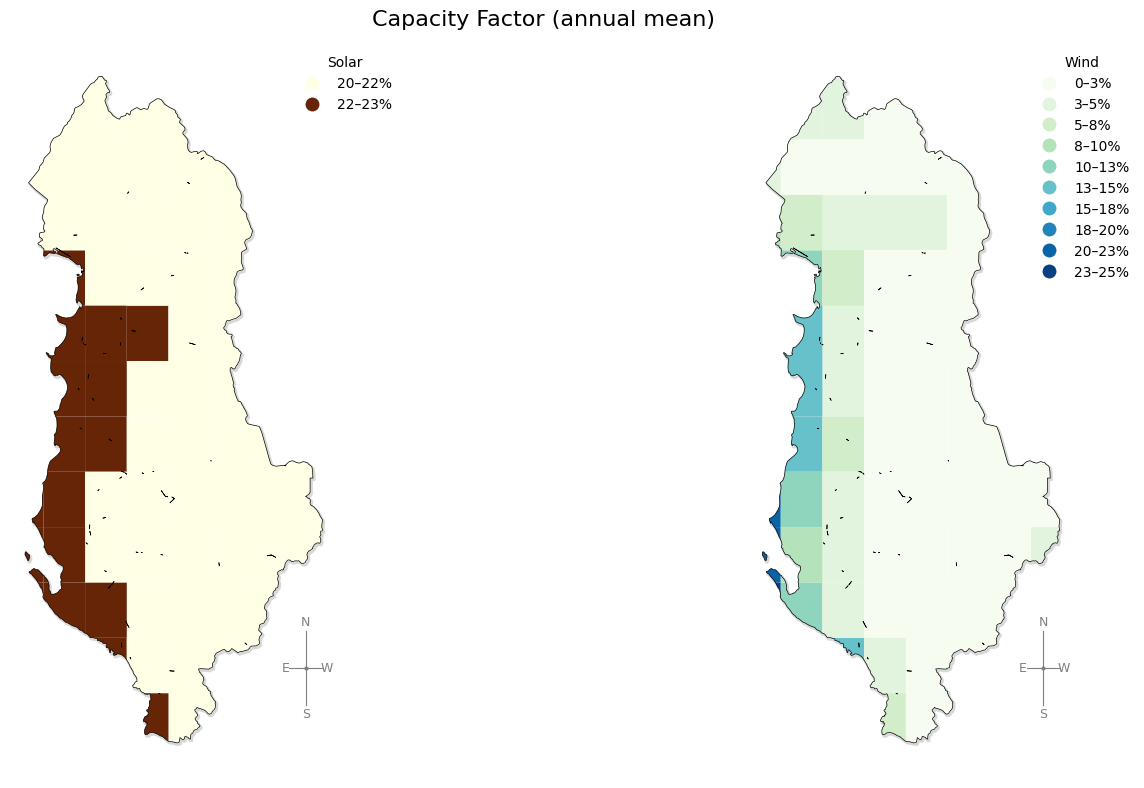

In [64]:
# Example usage:
# plot_data_map(cells, boundary,'lcoe',legend_x_ax_offset=1.2,custom_solar_bins=1,custom_wind_bins=5)
# plot_data_map(cells, boundary, 'potential_capacity',legend_x_ax_offset=1.2, custom_solar_bins=3,custom_wind_bins=5)
# Example usage:
plot_data_map(cells, boundary,'Cf',legend_x_ax_offset=1.2, min_bin_width_solar=0.02,min_bin_width_wind=0.015)

IndexError: index 0 is out of bounds for axis 0 with size 0

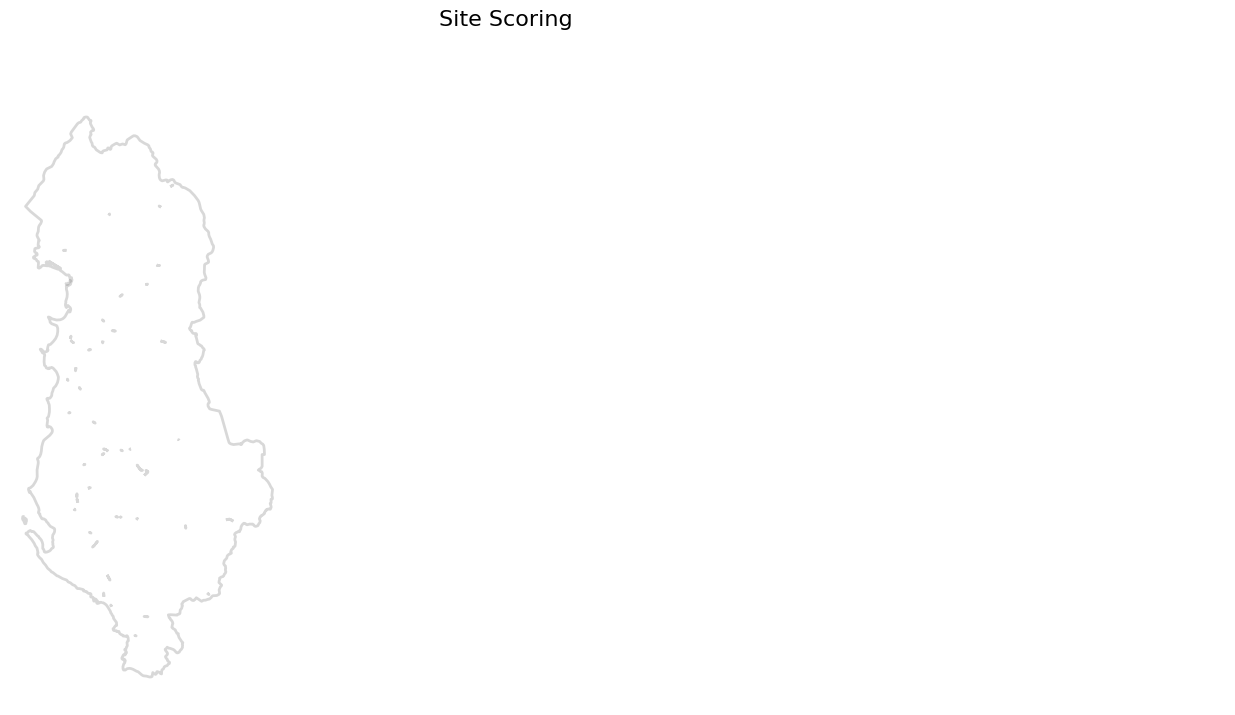

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# # Ensure 'Region' is in the columns for both boundary and cells
# if 'Region' not in boundary.columns:
#     boundary = boundary.reset_index(inplace=True)

# # Assign a number to each region
# boundary['Region_Number'] = range(1, len(boundary) + 1)

# Define custom bins and labels for solar and wind capacity
solar_bins = [20, 30, 50, 70, 80, float('inf')]  # Custom ranges
solar_labels = ['<20','20-30', '30-55','50-70','>80']  # Labels for legend

# Define custom bins and labels for solar and wind capacity
wind_bins = [20, 30, 40, 50, 60, 80, 100, float('inf')]  # Custom ranges
wind_labels = ['<20','20-30', '30-40','40-50','50-60', '60-80', '>100']  # Labels for legend

# Categorize potential_capacity_solar and potential_capacity_wind into bins
cells['solar_category'] = pd.cut(cells['lcoe_solar'], bins=solar_bins, labels=solar_labels, include_lowest=True)
cells['wind_category'] = pd.cut(cells['lcoe_wind'], bins=wind_bins, labels=wind_labels, include_lowest=True)

# Create figure and axes for side-by-side plotting
fig, (ax1, ax2) = plt.subplots(figsize=(18, 8), ncols=2)
fig.suptitle("Site Scoring", fontsize=16)
# Set axis off for both subplots
ax1.set_axis_off()
ax2.set_axis_off()

# Shadow effect offset
shadow_offset = 0.008

# Plot solar map on ax1
# Add shadow effect for solar map
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax1, facecolor='none', edgecolor='gray', linewidth=2, alpha=0.3)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# Plot solar cells
cells.plot(column='solar_category', ax=ax1, cmap='Wistia', legend=True, 
           legend_kwds={'title': "Solar Score ($/MWh)", 'loc': 'upper right','bbox_to_anchor':(legend_x_ax_offset,1),  'frameon': False})

# Plot actual boundary for solar map
boundary.plot(ax=ax1, facecolor='none', edgecolor='black', linewidth=0.7, alpha=0.9)

""" 
# Annotate region numbers for solar map
for idx, row in boundary.iterrows():
    centroid = row.geometry.centroid
    ax1.annotate(f"{row['Region_Number']}", 
                 xy=(centroid.x, centroid.y), 
                 ha='center', va='center',
                 fontsize=7, color='black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
"""
# Plot wind map on ax2
# Add shadow effect for wind map
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax2, color='None', edgecolor='k', linewidth=0.5, alpha=0.7)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# Plot wind cells
cells.plot(column='wind_category', ax=ax2, cmap='coolwarm', legend=True, 
           legend_kwds={'title': "Wind score ($/MWh)", 'bbox_to_anchor':(legend_x_ax_offset,1), 'frameon': False})

# Plot actual boundary for wind map
boundary.plot(ax=ax2, facecolor='none', edgecolor='black', linewidth=0.7, alpha=0.9)
"""
# Annotate region numbers for wind map
for idx, row in boundary.iterrows():
    centroid = row.geometry.centroid
    ax2.annotate(f"{row['Region_Number']}", 
                 xy=(centroid.x, centroid.y), 
                 ha='center', va='center',
                 fontsize=8, color='black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
"""
# Adjust layout for cleaner appearance
fig.patch.set_alpha(0)  # Make figure background transparent
# Add annotation to the figure
fig.text(0.5, -0.01, 
         "Note: The Scoring is calculated to reflect Dollar investment required to get an unit of Energy yield (MWh). "
         "\nTo reflect market competitiveness and incentives, the Score ($/MWh) needs financial adjustment factors to be considered on top of it.",
         ha='center', va='center', fontsize=10, color='gray', bbox=dict(facecolor='None', edgecolor='grey', boxstyle='round,pad=0.5'))
plt.tight_layout()

# Show the side-by-side plot

plt.savefig('solar_wind_score_map.png',dpi=300)
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Define colormaps
solar_cmap = cm.get_cmap('Wistia', len(solar_labels))
wind_cmap = cm.get_cmap('coolwarm', len(wind_labels))

# Generate colors for each bin
solar_colors = [mcolors.rgb2hex(solar_cmap(i)) for i in range(len(solar_labels))]
wind_colors = [mcolors.rgb2hex(wind_cmap(i)) for i in range(len(wind_labels))]

# Aggregate potential capacity for each bin
solar_capacity = cells.groupby('solar_category')['potential_capacity_solar'].sum().div(1e3).reindex(solar_labels, fill_value=0)
wind_capacity = cells.groupby('wind_category')['potential_capacity_wind'].sum().div(1e3).reindex(wind_labels, fill_value=0)

### Solar Plot ###
fig1, ax1 = plt.subplots(figsize=(4, 2))
fig1.patch.set_alpha(0)  # Make figure background transparent
ax1.set_facecolor('none')  # Make axis background transparent

ax1.barh(solar_capacity.index, solar_capacity.values, color=solar_colors, edgecolor='none')
ax1.set_title('Solar Simplified Levelized Cost of Energy', fontsize=9)
ax1.set_xlabel('Solar Potential (GW)', fontsize=10, weight='bold')
ax1.set_ylabel('$/MWh')
ax1.invert_yaxis()  # Highest bin appears at the top

# Remove spines for a clean look
for spine in ax1.spines.values():
    spine.set_visible(False)
ax1.tick_params(left=False, bottom=True)  # Remove y-axis ticks

plt.show()

### Wind Plot ###
fig2, ax2 = plt.subplots(figsize=(4, 2))
fig2.patch.set_alpha(0)  # Make figure background transparent
ax2.set_facecolor('none')  # Make axis background transparent

ax2.barh(wind_capacity.index, wind_capacity.values, color=wind_colors, edgecolor='none')
ax2.set_title('Wind Simplified Levelized Cost of Energy', fontsize=9)
ax2.set_xlabel('Wind Potential (GW)', fontsize=10, weight='bold')
ax2.set_ylabel('$/MWh')
ax2.invert_yaxis()  # Highest bin appears at the top

# Remove spines for a clean look
for spine in ax2.spines.values():
    spine.set_visible(False)
ax2.tick_params(left=False, bottom=True)  # Remove y-axis ticks

plt.show()

In [ ]:
cells_aggrs_region=cells.groupby('Region').aggregate({'potential_capacity_solar':'sum','potential_capacity_wind':'sum','nearest_station_distance_km':'mean','solar_CF_mean':'mean','wind_CF_mean':'mean','lcoe_solar':'mean','lcoe_wind':'mean'})

In [ ]:
# Map Population and GDP to gdf using Region
boundary["potential_capacity_solar"] = boundary['Region'].str.replace(' ', '').map(cells_aggrs_region["potential_capacity_solar"])
boundary["potential_capacity_wind"] = boundary['Region'].str.replace(' ', '').map(cells_aggrs_region["potential_capacity_wind"])
boundary["solar_CF_mean"] = boundary['Region'].str.replace(' ', '').map(cells_aggrs_region["solar_CF_mean"])
boundary["wind_CF_mean"] = boundary['Region'].str.replace(' ', '').map(cells_aggrs_region["wind_CF_mean"])
# Map Population and GDP to gdf using Region
boundary["potential_capacity_solar"] = boundary["potential_capacity_solar"].apply(lambda x: x / 1E3)
boundary["potential_capacity_wind"] = boundary["potential_capacity_wind"].apply(lambda x: x / 1E3)

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Ensure 'Region' is in the columns for both boundary and cells
if 'Region' not in boundary.columns:
    boundary = boundary.reset_index(inplace=True)

# Assign a number to each region
boundary['Region_Number'] = range(1, len(boundary) + 1)

# Define custom bins and labels for solar and wind capacity
bins = [0, 10, 20, 30, 40, 50, float('inf')]  # Custom ranges
labels = ['<10','10-20', '20-30','30-40','40-50','>50']  # Labels for legend

# Categorize potential_capacity_solar and potential_capacity_wind into bins
boundary['solar_category'] = pd.cut(boundary['potential_capacity_solar'], bins=bins, labels=labels, include_lowest=True)
boundary['wind_category'] = pd.cut(boundary['potential_capacity_wind'], bins=bins, labels=labels, include_lowest=True)

# Create figure and axes for side-by-side plotting
fig, (ax1, ax2) = plt.subplots(figsize=(18, 8), ncols=2)
fig.suptitle("Regional Potential", fontsize=16,weight='bold')
# Set axis off for both subplots
ax1.set_axis_off()
ax2.set_axis_off()

# Shadow effect offset
shadow_offset = 0.008

# Plot solar map on ax1
# Add shadow effect for solar map
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax1, facecolor='none', edgecolor='gray', linewidth=2, alpha=0.3)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# Plot solar cells
boundary.plot(column='solar_category', ax=ax1, cmap='summer', legend=True, 
           legend_kwds={'title': "Potential (GW)", 'loc': 'upper right','bbox_to_anchor':(legend_x_ax_offset,1),  'frameon': False})

# Plot actual boundary for solar map
boundary.plot(ax=ax1, facecolor='none', edgecolor='black', linewidth=0.7, alpha=0.9)

""" 
# Annotate region numbers for solar map
for idx, row in boundary.iterrows():
    centroid = row.geometry.centroid
    ax1.annotate(f"{row['Region_Number']}", 
                 xy=(centroid.x, centroid.y), 
                 ha='center', va='center',
                 fontsize=7, color='black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
"""
# Plot wind map on ax2
# Add shadow effect for wind map
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax2, color='None', edgecolor='k', linewidth=0.5, alpha=0.7)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# Plot wind cells
boundary.plot(column='wind_category', ax=ax2, cmap='summer', legend=False, 
           legend_kwds={'title': "Wind (GW))", 'bbox_to_anchor':(legend_x_ax_offset,1), 'frameon': False})

# Plot actual boundary for wind map
boundary.plot(ax=ax2, facecolor='none', edgecolor='black', linewidth=0.7, alpha=0.9)
"""
# Annotate region numbers for wind map
for idx, row in boundary.iterrows():
    centroid = row.geometry.centroid
    ax2.annotate(f"{row['Region_Number']}", 
                 xy=(centroid.x, centroid.y), 
                 ha='center', va='center',
                 fontsize=8, color='black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
"""
# Adjust layout for cleaner appearance
plt.tight_layout()
fig.patch.set_alpha(0)  # Make figure background transparent
# Show the side-by-side plot

# plt.savefig('solar_wind_regional_aggr_cap_map.png',dpi=300)
plt.show()